# Trabalho Prático - FRM

Você já conhece o fluxo de trabalho para construção de aplicações de aprendizado de máquina. Esse fluxo deve se estabelecer como um elemento norteador de projetos de soluções que aplicam aprendizado de Máquina. Cincos fases compõe o fluxo:

1. Identificação do problema de negócio,
2. Análise exploratória e preparação dos dados,
3. Criação dos modelos, treinamento e otimização,
4. Implantação dos modelos, previsões on-line e monitoramento e
5. Gestão dos modelos.

Você também já conhece algumas das principais bibliotecas Python usadas na construção de aplicações de aprendizado de máquina: numpy, pandas, scikit-learn (sklearn), matplotlib e tensorflow:

Nesse trabalho prático você deve usar os conhecimentos adquiridos para codificar scripts que realizem atividades de cada fase do fluxo de trabalho. O objetivo final do script é construir um modelo de classificação utilizando o dataset disponível na competição do Kaggle: ["Titanic: Machine Learning from Disaster”](https://www.kaggle.com/c/titanic/data). Esse modelo de classificação deverá ser capaz de prever quais passageiros sobreviveram à tragédia.

Nessa competição são disponibilizados um conjunto de dados de treinamento e um conjunto de dados de teste. A diferença entre os dois conjuntos é a existência de um atributo "Survived" no conjunto de treinamento. Esse atributo será o atributo alvo. Depois que o modelo for treinado o conjunto de teste deve ser submetido ao modelo para que ele faça previsões.  

Vamos começar: 

### Fase 1 - Identificação do problema de negócio

Nessa fase é necessário realizar entre outras atividades, a <b>obtenção dos dados identificados como relevantes</b>. Para o nosso problema de negócio, esses dados são os conjuntos de treino e teste da competição “Titanic: Machine Learning from Disaster”.  

Conjunto de treino: https://www.kaggle.com/c/titanic/download/train.csv <br/>
Conjunto de teste: https://www.kaggle.com/c/titanic/download/test.csv

Você vai precisar se autenticar no kaggle antes de realizar essa atividade

Crie na próxima célula um script para realizar essa atividade utilizando a biblioteca pandas. Imprima a quantidade de atributos e objetos de cada conjunto

In [606]:
#Carregue os conjuntos de dados nessa célula
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [703]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

### Fase 2 - Análise exploratória e preparação dos dados

Nessa fase é necessário realizar entre outras atividades a <b>análise exploratória de dados</b>, o que inclui análise estatística descritiva. Nas células a seguir utilize a biblioteca pandas para apresentar essa análise do conjunto de dados de treinamento e exibir os 10 primeiros objetos desse conjunto. 

In [704]:
#Análise estatistica descritiva
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [705]:
# informacoes dados de treino
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [706]:
# informacoes dados de test
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


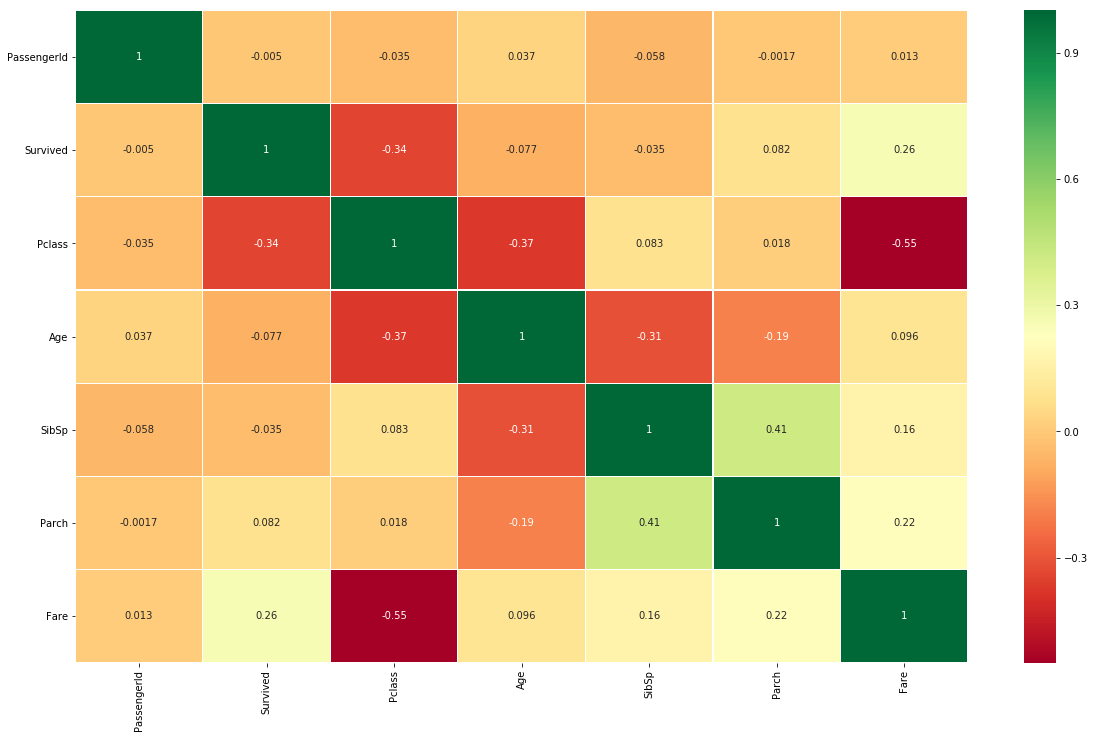

In [707]:
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [708]:
#10 primeiros regitros
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Ainda durante a fase 2 é necessário <b>remover algum(s) atributo(s) irrelevante(s) para classificação</b>. Faça isso nos conjuntos de treinamento e teste na próxima célula.

Lembre-se de remover o atributo "target" do conjunto de treinamento, mas não se esqueça de armazenar esse atributo em uma variável y para utilizá-lo na fase seguinte 

In [709]:
#Remover atributos irrelevantes 
#Removendo as colunas 'Cabin', 'Fare', 'Name', 'Ticket', 'Embarked' irrelevantes
train_data.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)

#Transformando colunas categoricas em numericas
train_data = pd.get_dummies(train_data)


#Removendo as colunas 'Cabin', 'Fare', 'Name', 'Ticket', 'Embarked' irrelevantes
test_data.drop(columns=['Cabin', 'Name', 'Ticket'], inplace=True)

#Transformando colunas categoricas em numericas
test_data = pd.get_dummies(test_data)

In [710]:
# Transformando a coluna Pclass em numerica
def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
        data = data.drop(column, axis=1)
    return data


dummy_columns = ["Pclass"]
train_data=dummy_data(train_data, dummy_columns)
test_data=dummy_data(test_data, dummy_columns)

In [711]:
train_data.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,3,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,4,1,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
4,5,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


In [712]:
test_data.head()

,PassengerId,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,892,34.5,0,0,7.8292,0,1,0,1,0,0,0,1
1,893,47.0,1,0,7.0000,1,0,0,0,1,0,0,1
2,894,62.0,0,0,9.6875,0,1,0,1,0,0,1,0
3,895,27.0,0,0,8.6625,0,1,0,0,1,0,0,1
4,896,22.0,1,1,12.2875,1,0,0,0,1,0,0,1


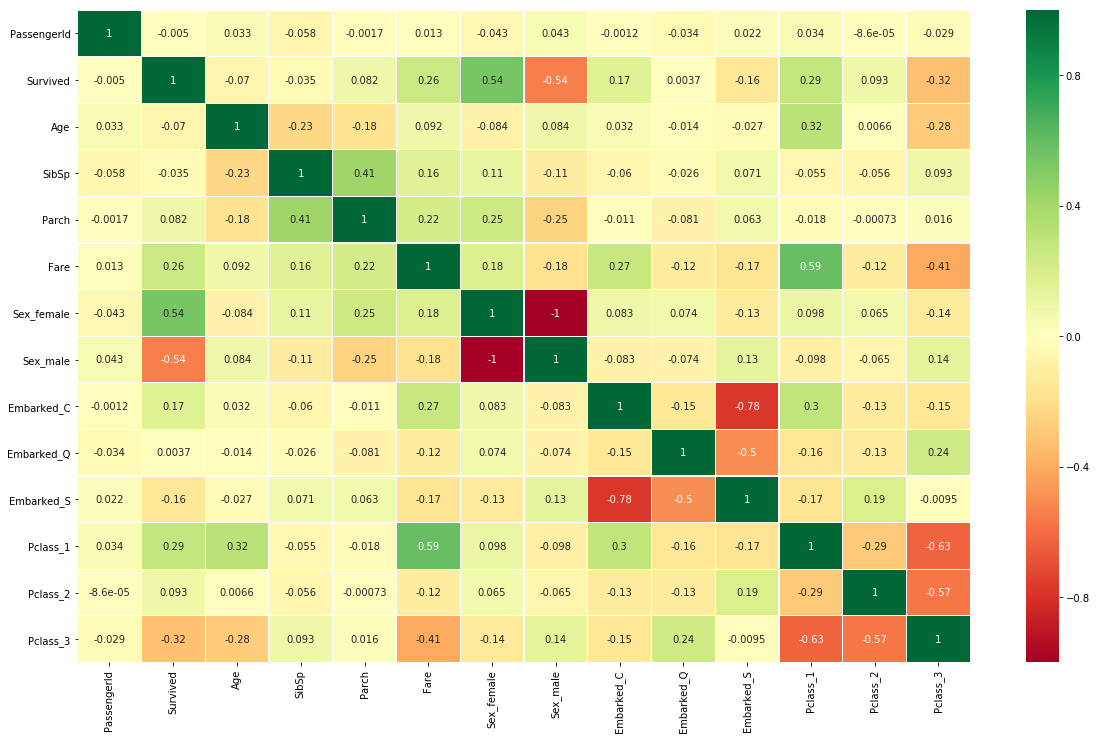

In [742]:
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

In [713]:
#Tratando os valores nulos do treino
train_data.isnull().sum().sort_values(ascending=False).head(10)

Age           177
Pclass_3        0
Pclass_2        0
Pclass_1        0
Embarked_S      0
Embarked_Q      0
Embarked_C      0
Sex_male        0
Sex_female      0
Fare            0
dtype: int64

In [714]:
# Colocando a media das idades nos registros nulos
train_data['Age'].fillna(train_data["Age"].mean(), inplace=True)
train_data.isnull().sum().sort_values(ascending=False).head(10)

Pclass_3      0
Pclass_2      0
Pclass_1      0
Embarked_S    0
Embarked_Q    0
Embarked_C    0
Sex_male      0
Sex_female    0
Fare          0
Parch         0
dtype: int64

In [715]:
#Tratando os valores nulos do test
test_data.isnull().sum().sort_values(ascending=False).head(10)

Age           86
Fare           1
Pclass_3       0
Pclass_2       0
Pclass_1       0
Embarked_S     0
Embarked_Q     0
Embarked_C     0
Sex_male       0
Sex_female     0
dtype: int64

In [716]:
# Colocando a media das idades nos registros nulos
test_data['Age'].fillna(test_data["Age"].mean(), inplace=True)
test_data.isnull().sum().sort_values(ascending=False).head(10)

Fare          1
Pclass_3      0
Pclass_2      0
Pclass_1      0
Embarked_S    0
Embarked_Q    0
Embarked_C    0
Sex_male      0
Sex_female    0
Parch         0
dtype: int64

In [717]:
# Colocando a media das idades nos registros nulos
test_data['Fare'].fillna(test_data["Fare"].mean(), inplace=True)
test_data.isnull().sum().sort_values(ascending=False).head(10)

Pclass_3      0
Pclass_2      0
Pclass_1      0
Embarked_S    0
Embarked_Q    0
Embarked_C    0
Sex_male      0
Sex_female    0
Fare          0
Parch         0
dtype: int64

### Fase 3 - Criação de modelos preditivos, treinamento e otimização

O objetivo dessa fase é <b>construir um modelo preditivo</b> (que faz previsões ou classificações) para obter o melhor desempenho possível. Para construir o melhor modelo você deve experimentar vários algoritmos (Regressão Logística, Naive Bayes, Árvore de Decisão, Redes Neurais, Redes Neurais profundas, etc) e selecionar o algoritmo que forneça o melhor modelo.

Para experimentar alguns certos algoritmos, você precisará realizar outra atividade da fase 2: <b>“Transformar dados válidos e limpos no formato mais adequado às necessidades do algoritmo”</b>. Por exemplo, para utilizar o Naive Bayes você precisará codificar os atributos nominais em atributos numéricos. 

Nas próximas duas células você deve construir e treinar dois modelos preditivos utilizando necessariamente as bibliotecas scikit-learn e o tensorflow. Pode ser necessário transformar os dados (codificação, discretização, etc). Depois de concluir o treinamento, você deve imprimir a acurácia dois modelos. 

In [718]:
#Modelo construido com o scikit-learn

#Variaveis de treino
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### DecisionTreeClassifier

In [719]:
from sklearn.tree import DecisionTreeClassifier

In [759]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)
print('Train Acc: ', tree.score(X_train, y_train))

Train Acc:  0.8362760834670947


In [760]:
y_true, y_pred = y_test, tree.predict(X_test)
target_names=['Morreu', 'Sobreviveu']
print('Test Acc: ', accuracy_score(y_true, y_pred))

Test Acc:  0.8208955223880597


In [722]:
print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

     Morreu       0.80      0.94      0.87       168
 Sobreviveu       0.86      0.61      0.71       100

avg / total       0.82      0.82      0.81       268



In [723]:
confusion_matrix(y_true, y_pred)

array([[158,  10],
       [ 39,  61]])

### LogisticRegression

In [724]:
from sklearn.linear_model import LogisticRegression

In [725]:
logreg = LogisticRegression(random_state=0, solver='liblinear', multi_class='ovr').fit(X, y)
logreg.fit(X_train, y_train)
print('Train Acc: ', logreg.score(X_train, y_train))

Train Acc:  0.8057784911717496


In [726]:
y_true, y_pred = y_test, logreg.predict(X_test)
target_names=['Morreu', 'Sobreviveu']
print('Test Acc: ', accuracy_score(y_true, y_pred))

Test Acc:  0.8022388059701493


In [727]:
print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

     Morreu       0.84      0.85      0.84       168
 Sobreviveu       0.74      0.72      0.73       100

avg / total       0.80      0.80      0.80       268



In [728]:
confusion_matrix(y_true, y_pred)

array([[143,  25],
       [ 28,  72]])

### SVM

In [729]:
from sklearn.svm import SVC

In [730]:
svc = SVC()
svc.fit(X_train, y_train)
print('Train Acc: ', svc.score(X_train, y_train))

Train Acc:  0.9951845906902087


In [731]:
y_true, y_pred = y_test, svc.predict(X_test)
target_names=['Morreu', 'Sobreviveu']
print('Test Acc: ', accuracy_score(y_true, y_pred))

Test Acc:  0.6082089552238806


In [732]:
print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

     Morreu       0.62      0.96      0.75       168
 Sobreviveu       0.22      0.02      0.04       100

avg / total       0.47      0.61      0.49       268



In [733]:
confusion_matrix(y_true, y_pred)

array([[161,   7],
       [ 98,   2]])

### RandomForestClassifier

In [734]:
from sklearn.ensemble import RandomForestClassifier

In [735]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
print('Train Acc: ', random_forest.score(X_train, y_train))

Train Acc:  0.985553772070626


In [736]:
y_true, y_pred = y_test, random_forest.predict(X_test)
target_names=['Morreu', 'Sobreviveu']
print('Test Acc: ', accuracy_score(y_true, y_pred))

Test Acc:  0.832089552238806


### GradientBoostingClassifier

In [737]:
from sklearn.ensemble import GradientBoostingClassifier

In [738]:
gbc = GradientBoostingClassifier(learning_rate=0.1,max_depth=3)
gbc.fit(X_train, y_train)
print('Train Acc: ', gbc.score(X_train, y_train))

Train Acc:  0.9165329052969502


In [739]:
y_true, y_pred = y_test, gbc.predict(X_test)
target_names=['Morreu', 'Sobreviveu']
print('Test Acc: ', accuracy_score(y_true, y_pred))

Test Acc:  0.8246268656716418


In [740]:
#modelo construido com o tensorflow


<b>Qual modelo teve a maior acurácia?</b> Vamos analisar esse modelo utilizando uma matriz de confusão e o relatório de precisão, sensibilidade (recall) e f-1 (f-measure). Na célula seguinte utilize o pacote sklearn.metrics para imprimir essa duas informações, utilizando o conjunto de treinamento:

In [741]:
#Matriz de confusão e o relatório de precisão, sensibilidade (recall) e f-1 (f-measure)

### Fase 4: Implantação de modelo, previsões on-lines e monitoramento

São objetivos dessa fase implantar os modelos construídos na fase anterior e utilizá-lo para fazer previsões. 

Uma vez que seu modelo alcançou uma performance excelente, finalmente você pode utilizá-lo para  prever quais passageiros sobreviveram à tragédia do Titanic. Então faça isso na célula abaixo.

<b>Não se esqueça que as previsões devem ser realizadas com o conjunto de dados de teste.</b>

In [647]:
#previsoes

### Fase 5: Gestão dos modelos

São objetivos dessa fase monitorar e registrar a qualidade das previsões realizadas pelo modelo. 

Seu modelo já fez previsões para objetos “desconhecidos” na fase 4, mas ainda não sabemos a qualidade dessas previsões. Devemos descobrir essa informação para avaliarmos se é necessário voltar em alguma fase do fluxo de trabalho e realizar algum outro procedimento (limpar atributos, experimentar outros modelos, otimizar os modelos já experimentados).

Para descobrir a qualidade do seu modelo, você precisará submeter as previsões já realizada na competição [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/submit) do Kaggle. As previsões do modelo precisam ser salvas em um arquivo csv com os atributos passengerId e Survived ([Veja o exemplo](previsoes-exemplo.csv)) e depois você precisa enviar o arquivo e fazer a submissão. 

<b>Depois de fazer a submissão, faça uma captura da tela para anexar no relatorio da atividade prática ([Exemplo](exemplo-submissao.png))</b>

Na célula a seguir você deve criar o arquivo "previsoes.csv" com as previsões realizadas pelo seu modelo utilizando a biblioteca numpy. 

<b>Dica: use os as funções [np.column_stack](https://docs.scipy.org/doc/numpy/reference/generated/numpy.column_stack.html) e [np.savetxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.savetxt.html)</b>

In [792]:
#Criar o arquivo "previsoes.csv"
columns = np.column_stack((test_data['PassengerId'], tree.predict(test_data)))
np.savetxt('previsoes.csv', columns.astype(int), fmt='%i', delimiter=',', header='PassengerId,Survived', comments="") 